In [1]:
from sm_bbo.functions import add_noise, rastrigin_function, rosenbrock_function, ackley_function, make_max
from sm_bbo.optimisers import random_search
from sm_bbo.score_matching import simulate_samples_and_grad, fit_BO
import cma
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import optax
import torch
import pickle

def running_max(D):
    return [max(v for _, v in D[:i+1]) for i in range(len(D))]

/home/minny/anaconda3/envs/bo-sm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
param_dims = [5, 10, 20]  # 3 different param_dim values
seeds = range(10)  # 10 different seeds
results = {}

optimizer = optax.adam(5e-1)
M = 10
K = 5
T = 5
target_fn = make_max(add_noise(rosenbrock_function))

for param_dim in param_dims:
    var_hyper = np.eye(param_dim) / 2
    results[param_dim] = {}
    for seed in seeds:
        np.random.seed(seed)
        torch.manual_seed(seed)

        X_obs = np.random.uniform(-5, 10, size=(4, param_dim))
        func_evals = np.apply_along_axis(
                target_fn, 
                1, 
                X_obs)
        D = []
        D.extend(list(zip(X_obs, func_evals)))
        init_param, max_fn_tau = max(D, key=lambda x: x[1])

        D = fit_BO(init_param, 
                D, 
                target_fn, 
                max_fn_tau,
                var_hyper,
                optimizer,
                T,
                K,
                M)

        running_max_D = list(map(lambda x: -x, running_max(D)))
        # Negate the functio
        results[param_dim][seed] = running_max_D

# Now 'results' is a nested dictionary that can be easily stored to disk
# It's structured as: {param_dim: {seed: running_min}}

# Save the results dictionary to disk
with open('results_sm_bbo_rosenbrock.pkl', 'wb') as f:
    pickle.dump(results, f)

In [3]:
param_dims = [5, 10, 20]  # 3 different param_dim values
seeds = range(10)  # 10 different seeds
results = {}

optimizer = optax.adam(5e-1)

M = 10
K = 5
T = 5
target_fn = make_max(add_noise(ackley_function))

for param_dim in param_dims:
    results[param_dim] = {}
    var_hyper = np.eye(param_dim)
    for seed in seeds:
        np.random.seed(seed)
        torch.manual_seed(seed)

        X_obs = np.random.uniform(-5, 10, size=(4, param_dim))
        func_evals = np.apply_along_axis(
                target_fn, 
                1, 
                X_obs)
        D = []
        D.extend(list(zip(X_obs, func_evals)))
        init_param, max_fn_tau = max(D, key=lambda x: x[1])

        D = fit_BO(init_param, 
                D, 
                target_fn, 
                max_fn_tau,
                var_hyper,
                optimizer,
                T,
                K,
                M)

        running_max_D = list(map(lambda x: -x, running_max(D)))
        # Negate the functio
        results[param_dim][seed] = running_max_D

# Now 'results' is a nested dictionary that can be easily stored to disk
# It's structured as: {param_dim: {seed: running_min}}

# Save the results dictionary to disk
with open('results_sm_bbo_ackley.pkl', 'wb') as f:
    pickle.dump(results, f)

In [4]:
param_dims = [5, 10, 20]  # 3 different param_dim values
seeds = range(10)  # 10 different seeds
results = {}

optimizer = optax.adam(5e-1)
M = 10
K = 5
T = 5
target_fn = make_max(add_noise(rastrigin_function))

for param_dim in param_dims:
    results[param_dim] = {}
    var_hyper = np.eye(param_dim) * 5
    for seed in seeds:
        np.random.seed(seed)
        torch.manual_seed(seed)

        X_obs = np.random.uniform(-5, 10, size=(4, param_dim))
        func_evals = np.apply_along_axis(
                target_fn, 
                1, 
                X_obs)
        D = []
        D.extend(list(zip(X_obs, func_evals)))
        init_param, max_fn_tau = max(D, key=lambda x: x[1])

        D = fit_BO(init_param, 
                D, 
                target_fn, 
                max_fn_tau,
                var_hyper,
                optimizer,
                T,
                K,
                M)

        running_max_D = list(map(lambda x: -x, running_max(D)))
        # Negate the functio
        results[param_dim][seed] = running_max_D

# Now 'results' is a nested dictionary that can be easily stored to disk
# It's structured as: {param_dim: {seed: running_min}}

# Save the results dictionary to disk
with open('results_sm_bbo_rastrigin.pkl', 'wb') as f:
    pickle.dump(results, f)

In [48]:
optimizer = optax.adam(5e-1)
param_dim = 10
var_hyper = np.eye(param_dim) * 5
M = 10
K = 5
T = 5
target_fn = make_max(add_noise(rastrigin_function))

np.random.seed(0)

X_obs = np.random.uniform(-5, 10, size=(4, param_dim))
func_evals = np.apply_along_axis(
        target_fn, 
        1, 
        X_obs)
D = []
D.extend(list(zip(X_obs, func_evals)))
init_param, max_fn_tau = max(D, key=lambda x: x[1])
D = fit_BO(init_param, 
           D, 
           target_fn, 
           max_fn_tau,
           var_hyper,
           optimizer,
           T,
           K,
           M)

def running_max(D):
    return [max(v for _, v in D[:i+1]) for i in range(len(D))]
running_max_D = list(map(lambda x: -x, running_max(D)))
# Negate the function evaluations

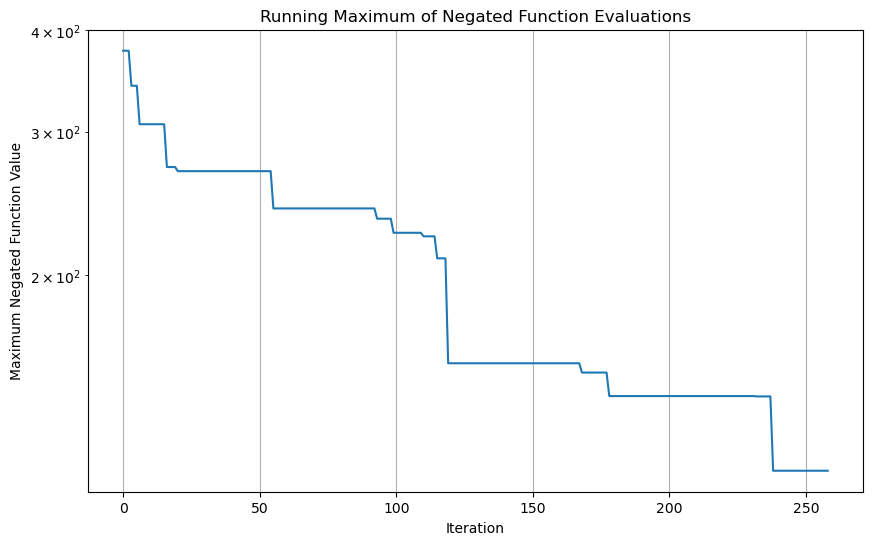

In [49]:
# Plot the running maximum
plt.figure(figsize=(10, 6))
plt.plot(running_max_D)
plt.title('Running Maximum of Negated Function Evaluations')
plt.xlabel('Iteration')
plt.ylabel('Maximum Negated Function Value')
plt.yscale('log')  # Using log scale for better visualization
plt.grid(True)
plt.show()